### **Question 2(b)**

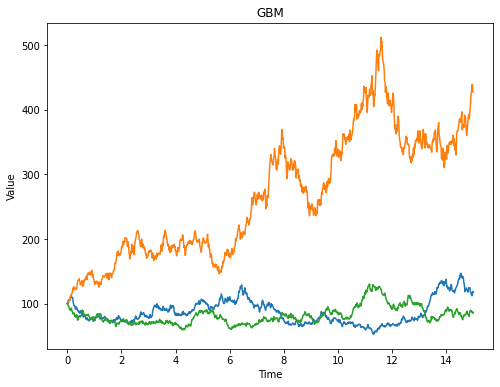

In [5]:
from numpy.random.mtrand import seed
import matplotlib.pyplot as plt
import numpy as np
seed(42)
#parameters
S0 = 100
K = 105
T = 15.0
r = 0
sigma = 0.2

I = 1000 ## Simulating I paths
dt=T/(I+1)
t=np.linspace(0,T,I) #This line of code give us the time stamps

#Different Ito's formula
St_1=np.zeros(I)
St_2=np.zeros(I)
St_3=np.zeros(I)
#Initial value
St_1[0]=S0
St_2[0]=S0
St_3[0]=S0
#Randomizing the I for Monte Carlo simulation
z_1=np.random.randn(I)
z_2=np.random.randn(I)
z_3=np.random.randn(I)
#For loop for generation a random motion a 1000 times
for i in range(1,1000):
  St_1[i] = St_1[i-1] * np.exp((r-0.5*sigma**2) * dt + sigma * np.sqrt(dt) * z_1[i-1])
  St_2[i] = St_2[i-1] * np.exp((r-0.5*sigma**2) * dt + sigma * np.sqrt(dt) * z_2[i-1])
  St_3[i] = St_3[i-1] * np.exp((r-0.5*sigma**2) * dt + sigma * np.sqrt(dt) * z_3[i-1])

plt.figure(figsize=(8,6)) #This code make the size of the plot
#Plots different Ito's formula graphs
plt.plot(t,St_1)
plt.plot(t,St_2)
plt.plot(t,St_3)

plt.title('GBM') #This line of code gives the title of the graph
plt.xlabel('Time') #This line of code labels the x axis
plt.ylabel('Value') #This line of code labels the y axis
plt.show() #This line shows the graphs

### **Question 3**

In [8]:
# Monte Carlo simulation

#imports to used for calculations
import math
import numpy as np
np.random.seed(142)
# Parameters
S0 = 50
K = 55
T = 3.0
r = 0.02
sigma = 0.2
dt = T / 50
I = 250000
# Simulating I paths with M time steps
S = np.zeros((51, I))
S[0] = S0
for t in range(1, 51):
  z = np.random.standard_normal(I) #This line of code creates the pseudorandom numbers
  S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
  + sigma * math.sqrt(dt) * z)

# Calculating the Monte Carlo estimator
M_C0 = math.exp(-r * T) * np.sum(np.maximum(K - S[-1], 0)) / I
print ("European Option Value:",M_C0)

European Option Value: 7.929922371686727


### **Question 4(b)**

fixed a=10,b=2 and($σ_{1}=23\%$ and $σ_{2}=27\%$)

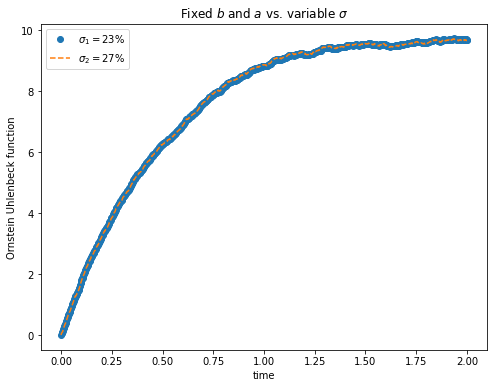

In [15]:
#imports to used for calculations
import numpy as np
import matplotlib.pyplot as plt
seed(44)

#These are model parameters
t_0 = 0 
t_end = 2
length = 1000
b = 2
a = 10
sigma_1 = 0.23
sigma_2 = 0.27

t = np.linspace(t_0,t_end,length) #This line of code define time stamps
dt = np.mean(np.diff(t))
y_1 = np.zeros(length)
y_2 = np.zeros(length)

y0 = np.random.normal(loc=0.0,scale=1.0) #This line of code gives us the initial conditions
drift = lambda y,t: b*(a-y) #This of line code defines drift term
diffusion_1 = lambda y,t: sigma_1 #This of line code defines diffusion term for first sigma
diffusion_2 = lambda y,t: sigma_2 #This of line code defines diffusion term for second sigma
noise = np.random.normal(loc=0.0,scale=1.0,size=length)*np.sqrt(dt) #This line of code define noise process in the model

#This line of code below solves the SDE
for i in range(1,length):
  y_1[i] = y_1[i-1] + drift(y_1[i-1],i*dt)*dt + diffusion_1(y_1[i-1],i*dt)*noise[i]
  y_2[i] = y_2[i-1] + drift(y_2[i-1],i*dt)*dt + diffusion_2(y_2[i-1],i*dt)*noise[i]

plt.figure(figsize=(8,6))#This code make the size of the plot
plt.plot(t,y_1,'o',label='$\sigma_{1}=23\%$') #This of line code plots for first sigma
plt.plot(t,y_2,'--',label='$\sigma_{2}=27\%$') #This of line code plots for second sigma
plt.ylabel('Ornstein Uhlenbeck function') #This line of code labels the y axis
plt.xlabel('time') #This line of code labels the x axis
plt.title('Fixed $b$ and $a$ vs. variable $\sigma$') #This line of code gives the title of the graph
plt.legend()#This line of code shows the legends of the graph
plt.show() #This line shows the graphs

### **The change in $σ$ does not really affect the growth progression of the Ornstein Uhlenbeck function graph.**

Fixed $\sigma=29\%$ and $a=10$ vs. variable $b=3\& b=4$

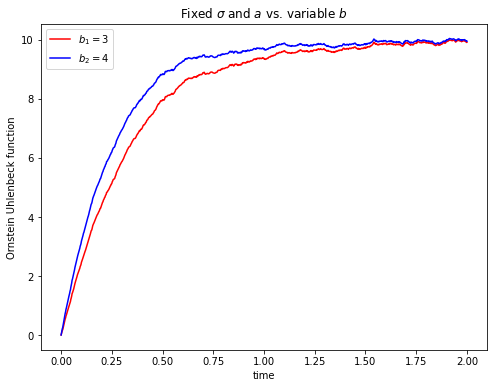

In [14]:
import numpy as np
import matplotlib.pyplot as plt
seed(45)

#These are model parameters
t_0 = 0
t_end = 2
length = 1000
b_1 = 3
b_2 = 4
a = 10
sigma = 0.29


t = np.linspace(t_0,t_end,length) #This line of code define time stamps
dt = np.mean(np.diff(t))
y_1 = np.zeros(length)
y_2 = np.zeros(length)

y0 = np.random.normal(loc=0.0,scale=1.0) #This line of code gives us the initial conditions

drift_1 = lambda y,t: b_1*(a-y) #This line of code defines the first drift term
drift_2 = lambda y,t: b_2*(a-y) #This line of code defines the second drift term

diffusion = lambda y,t: sigma #This of line code defines diffusion term
noise = np.random.normal(loc=0.0,scale=1.0,size=length)*np.sqrt(dt) #This line of code define noise process in the model

#This line of code below solves the SDE
for i in range(1,length):
 y_1[i] = y_1[i-1] + drift_1(y_1[i-1],i*dt)*dt + diffusion(y_1[i-1],i*dt)*noise[i]
 y_2[i] = y_2[i-1] + drift_2(y_2[i-1],i*dt)*dt + diffusion(y_2[i-1],i*dt)*noise[i]


plt.figure(figsize=(8,6)) #This code make the size of the plot
plt.plot(t,y_1, 'red',label='$b_{1}=3$') #This of line code plots the first drift term
plt.plot(t,y_2, 'blue',label='$b_{2}=4$') #This of line code plots the second drift term
plt.title('Fixed $\sigma$ and $a$ vs. variable $b$') #This line of code gives the title of the graph
plt.legend() #This line of code shows the legends of the graph
plt.ylabel('Ornstein Uhlenbeck function') #This line of code labels the y axis
plt.xlabel('time') #This line of code labels the x axis
plt.show()#This line shows the graphs

### **As the value of $b$ changes the to smaller value the model becomes linear.**